<a href="https://colab.research.google.com/github/pavithra-yasiru/XGBoost/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/XGBoost for Business Machine Learning Course in Python & R/Machine Learning and Data Science/XGBoost - Python/bank-full.csv',
                      sep = ";")
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
dataset.shape

(45211, 17)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Data Processing

In [ ]:
dataset['y'].value_counts()

,count
y,
no,39922
yes,5289


In [ ]:
dataset['y'] = np.where(dataset['y'] == 'yes', 1, 0)

dataset['y'].value_counts()

,count
y,
0,39922
1,5289


In [ ]:
x = dataset.select_dtypes(include=[np.number]).drop(['y'], axis=1)

y = dataset['y']

In [ ]:
x.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1502)

In [ ]:
# Create DMatrix for XGBoost

import xgboost as xgb

train = xgb.DMatrix(x_train, label=y_train)

test = xgb.DMatrix(x_test, label=y_test)

# XGBoost

In [ ]:
# Set the parameters for XGBoost model

params = {
    'objective': 'binary:logistic', # Model output
    'max_depth': 2, # Dicision tree size
    'learning_rate': 0.3, # Model updating frequency
    'subsample': 1, # How many training data use
    'colsample_bytree': 1, # Feature selection for the tree
    'min_child_weight': 1, # Minimum weights for a child node
    'gamma': 0, # Making splits in tree
    'random_state': 1502,
    'eval_metric': ['auc', 'aucpr'], # Tracking the model's performance / aucpr for imbalanced data
    'device': 'gpu' # Computations
}

In [ ]:
# Train the XGBoost model

classifier1 = xgb.train(
    params = params, # Hyperparameters
    dtrain = train, # Train set in DMatrix
    num_boost_round = 100, # How many trees
    evals = [(test, "Test")], # Track the performance
    verbose_eval = 10, # Monitor the progress by 10 round
    early_stopping_rounds = 10 # If not progress training stop
    )

[0]	Test-auc:0.75018	Test-aucpr:0.35474
[10]	Test-auc:0.85161	Test-aucpr:0.43479
[20]	Test-auc:0.86671	Test-aucpr:0.45388
[30]	Test-auc:0.87042	Test-aucpr:0.46213
[40]	Test-auc:0.87415	Test-aucpr:0.47089
[50]	Test-auc:0.87553	Test-aucpr:0.47261
[60]	Test-auc:0.87708	Test-aucpr:0.47909
[70]	Test-auc:0.87840	Test-aucpr:0.48314
[75]	Test-auc:0.87861	Test-aucpr:0.48351


In [ ]:
# Make predictions

pred1 = classifier1.predict(test)

print(pred1)

[0.14789549 0.00937669 0.02345659 ... 0.29442587 0.7149924  0.0241687 ]


In [ ]:
# Roundup the predictions

pred1 = np.where(pred1 > 0.5, 1, 0)

print(pred1)

[0 0 0 ... 0 1 0]


In [ ]:
# Checking the accuracy & classifications

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7942
           1       0.59      0.30      0.40      1101

    accuracy                           0.89      9043
   macro avg       0.75      0.64      0.67      9043
weighted avg       0.87      0.89      0.87      9043



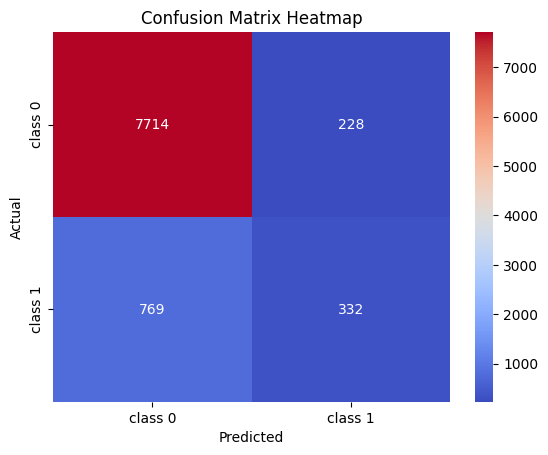

In [ ]:
# Visualize the confusion matrix with a heatmap

cm1 = confusion_matrix(y_test, pred1)

sns.heatmap(cm1,
            annot = True,
            cmap = 'coolwarm',
            fmt = 'g',
            xticklabels = ["class 0", "class 1"],
            yticklabels = ["class 0", "class 1"])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Data Processing part 2

In [ ]:
# Select the categorical variables

dataset_cat = dataset.select_dtypes(include = ['object'])

dataset_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [ ]:
# Transforming the categorical variables into dummies

dataset_cat = pd.get_dummies(dataset_cat, drop_first = True, dtype = int)

dataset_cat.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Join the dataset_cat with the numerical dataset

x = pd.concat([x, dataset_cat], axis = 1)

x.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Store the feature_names

feature_names = x.columns.to_list()

feature_names

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [ ]:
# Split the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1502)

In [ ]:
# Create the DMatrix for the Model

train = xgb.DMatrix(x_train, label = y_train, feature_names = feature_names)

test = xgb.DMatrix(x_test, label = y_test, feature_names = feature_names)

In [ ]:
# Create second xgboost model

classifier2 = xgb.train(
    params = params, # Hyperparameters
    dtrain = train, # Train set in DMatrix
    num_boost_round = 100, # How many trees
    evals = [(test, "Test")], # Track the performance
    verbose_eval = 10, # Monitor the progress by 10 round
    early_stopping_rounds = 10 # If not progress training stop
    )

[0]	Test-auc:0.74351	Test-aucpr:0.39898
[10]	Test-auc:0.88975	Test-aucpr:0.52366
[20]	Test-auc:0.90336	Test-aucpr:0.54843
[30]	Test-auc:0.91232	Test-aucpr:0.56103
[40]	Test-auc:0.91647	Test-aucpr:0.56878
[50]	Test-auc:0.91979	Test-aucpr:0.57278
[60]	Test-auc:0.92125	Test-aucpr:0.57430
[63]	Test-auc:0.92162	Test-aucpr:0.57502


In [ ]:
# Predict with the model

pred2 = classifier2.predict(test)

pred2 = np.where(pred2 > 0.5, 1, 0)

pred2

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Checking the accuracy & classifications

print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7942
           1       0.63      0.38      0.47      1101

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043



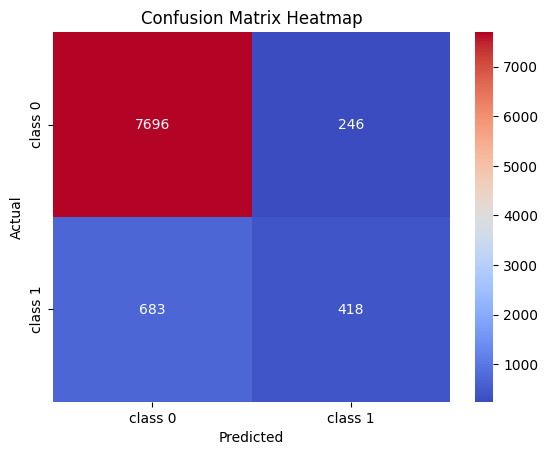

In [ ]:
# Visualize the confusion matrix with a heatmap

cm2 = confusion_matrix(y_test, pred2)

sns.heatmap(cm2,
            annot = True,
            cmap = 'coolwarm',
            fmt = 'g',
            xticklabels = ["class 0", "class 1"],
            yticklabels = ["class 0", "class 1"])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

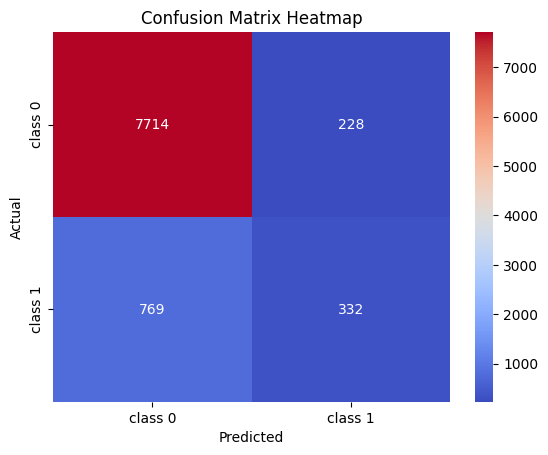

In [ ]:
cm1 = confusion_matrix(y_test, pred1)

sns.heatmap(cm1,
            annot = True,
            cmap = 'coolwarm',
            fmt = 'g',
            xticklabels = ["class 0", "class 1"],
            yticklabels = ["class 0", "class 1"])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Parameter Tuning

In [ ]:
# set the parameter grid for hyperparameter tuning

tune_grid = {
    'max_depth': [2, 4, 6, 8], # Dicision tree size
    'learning_rate': [0.05, 0.15, 0.3], # Model updating frequency
    'subsample': [0.5,0.8,1], # How many training data use
    'colsample_bytree': [0.5,0.8,1], # Feature selection for the tree
    'min_child_weight': [1, 2, 3, 4], # Minimum weights for a child node
    'gamma': [0, 0.1], # Making splits in tree
    'n_estimators': [50, 100, 200, 300], # No of boosting rounds
    'booster': ['gbtree'] # Booster type
}

In [ ]:
# Instantiate the classifier

from xgboost import XGBClassifier

classifier3 = XGBClassifier(
    objective = 'binary:logistic', # Output
    device = 'cuda', #Computation
    eval_metric = ['aucpr'], # Tracking the performance (imbalance data)
    tree_method = 'hist' # Tree method
)

In [ ]:
# Use randomingSearchCV

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator = classifier3, # objective
    param_distributions = tune_grid, # Parameter values
    n_iter = 50, # No of parameter settings
    cv = 3, # Cross validation splitting strategy
    scoring = 'f1', # Cross validation performance check
    n_jobs = -1,  # Computation(processor)
    verbose = 3, # Cross validation computation time, score check
    random_state = 1502
)

random_search.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='cuda',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=['aucpr'],
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learni...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.5, 0.8, 1],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.05, 0.15, 0.3],
                                        'max_depth': [2, 4, 6, 8],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.5, 0.8, 1]},
                   random_state=1502, scoring='f1', verbose=3)

In [ ]:
# Retrive and display the best parameters

best_params = random_search.best_params_

print(f'Best Parameters : {best_params}')

Best Parameters : {'subsample': 1, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 6, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 1, 'booster': 'gbtree'}


# Final XGBoost model

In [ ]:
# Use the best parameters for the final model

final_model = random_search.best_estimator_

final_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['aucpr'],
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Checking the predictions with probability

prob_pred = final_model.predict_proba(x_test)

prob_pred

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:53:18] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


array([[0.85807544, 0.14192457],
       [0.9972885 , 0.00271145],
       [0.9750124 , 0.02498761],
       ...,
       [0.74985886, 0.25014114],
       [0.44890475, 0.55109525],
       [0.996469  , 0.00353096]], dtype=float32)

In [ ]:
# Make the final prediction

final_pred = final_model.predict_proba(x_test)[:, 1] # Get 1 probability

final_pred = np.where(final_pred > 0.01, 1, 0) # Put a threshold

final_pred

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# evaluate the classification report

print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74      7942
           1       0.25      0.99      0.40      1101

    accuracy                           0.63      9043
   macro avg       0.62      0.79      0.57      9043
weighted avg       0.91      0.63      0.70      9043



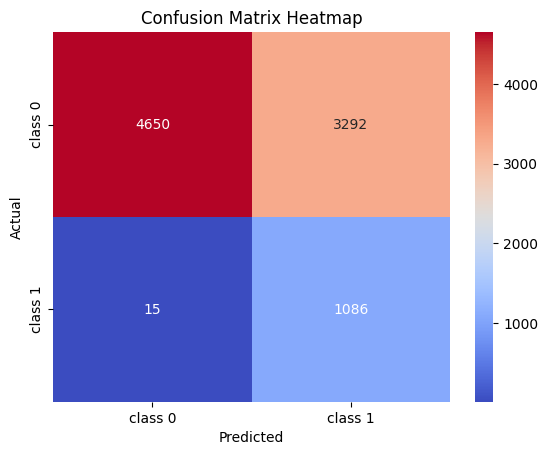

In [ ]:
# evaluate the confusion matrix

cm3 = confusion_matrix(y_test, final_pred)

sns.heatmap(cm3,
            annot = True,
            cmap = 'coolwarm',
            fmt = 'g',
            xticklabels = ["class 0", "class 1"],
            yticklabels = ["class 0", "class 1"])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Explainable AI (XAI)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

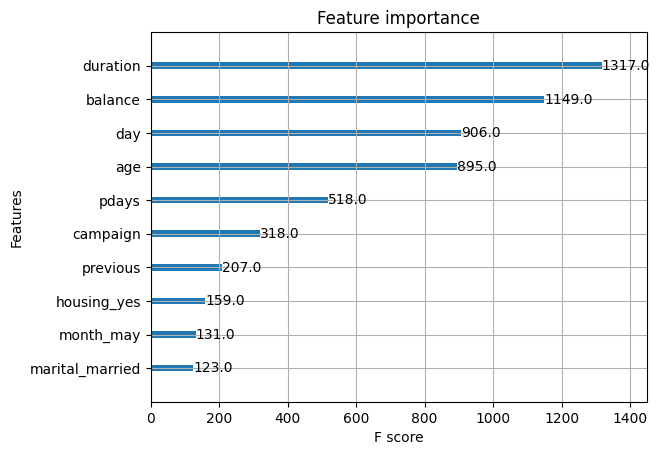

In [ ]:
# Plot the feature importance

xgb.plot_importance(final_model, max_num_features = 10)

In [ ]:
# SHAP interpretability

import shap

explainer = shap.TreeExplainer(final_model)

shap_values = explainer.shap_values(x_test)

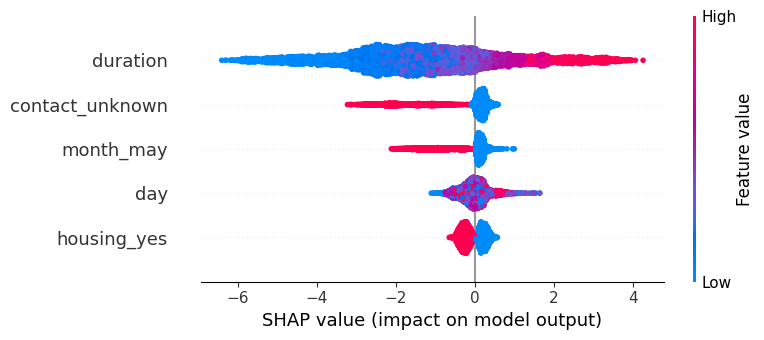

In [ ]:
# SHAP summary

shap.summary_plot(shap_values, x_test, max_display = 5)

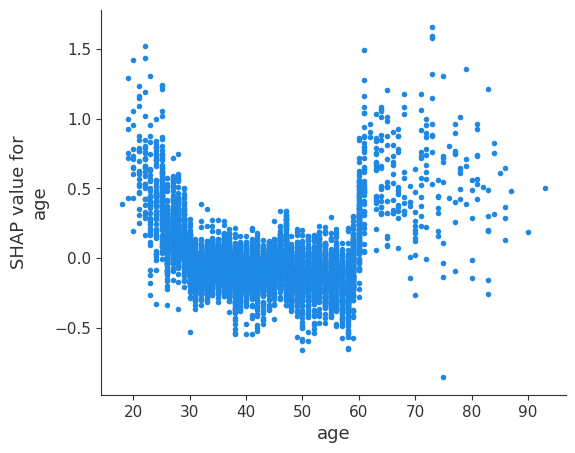

In [ ]:
# Dependence plot with Age

shap.dependence_plot('age', shap_values, x_test, interaction_index = None)

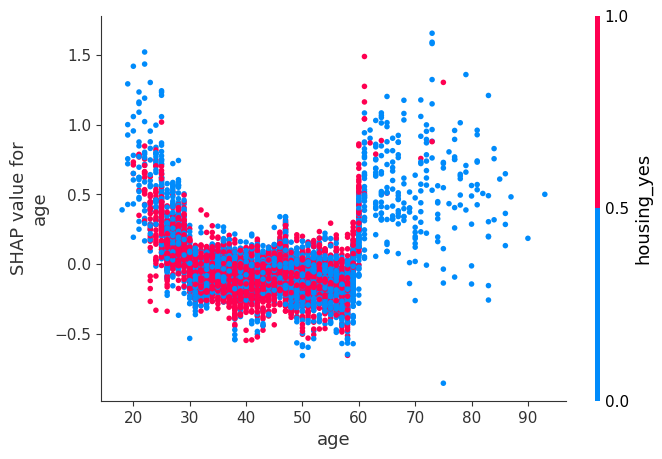

In [ ]:
 shap.dependence_plot('age', shap_values, x_test, interaction_index = "housing_yes")

In [ ]:
# SHAP Force plot to explain single prediction

shap.initjs()

index = 0

shap.force_plot(explainer.expected_value, shap_values[index], x_test.iloc[index])

In [ ]:
# Genarate a clustered force plot for the first 10

shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[:10], x_test[:10])

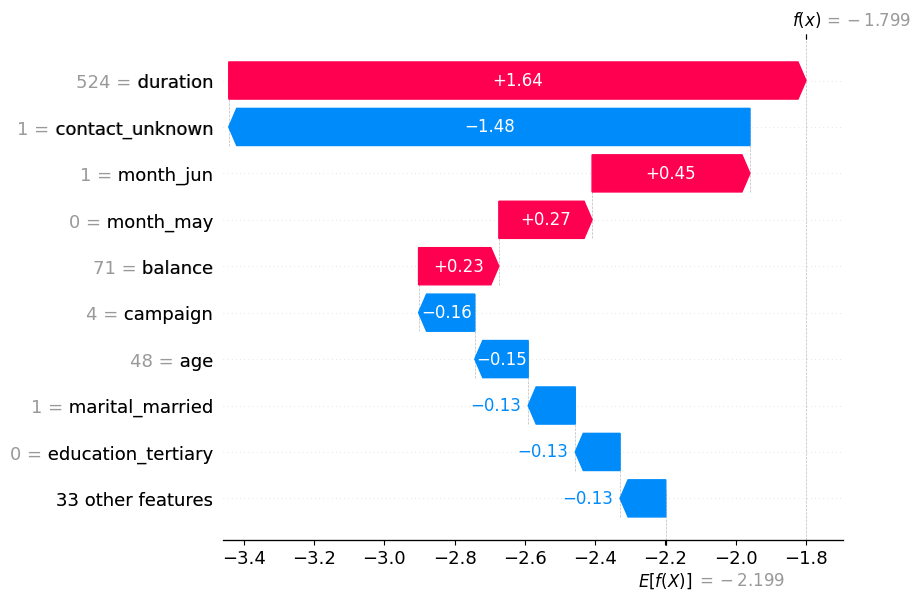

In [ ]:
# Create a waterfall plot

shap.waterfall_plot(shap.Explanation(
    values = shap_values[index],
    base_values = explainer.expected_value,
    data = x_test.iloc[index],
))

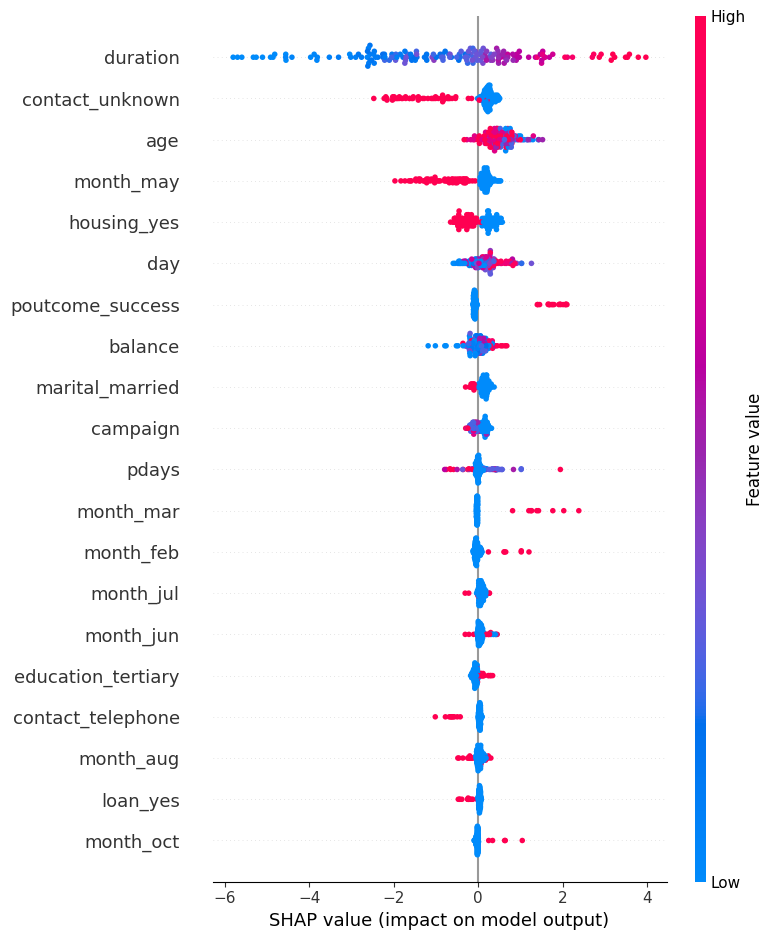

In [ ]:
# Create a cohort Summary plot based on age

cohort = x_test[x_test['age'] < 25]
cohort_shap_values = explainer.shap_values(cohort)

# Plot a summary plot

shap.summary_plot(cohort_shap_values, cohort)